## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 16
---------------------------------------

GOALS:

1. Work to understand when a linear model vs. non-linear model is a good choice.
2. Practice plotting residuals and regression lines.
3. Do an analysis using non-linear regression.


----------------------------------------------------------

This homework has **2 Questions** and **3 Exercises**

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


## Announcements

**Come to Lab!** If you need help we are here to help!

## Day 16 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day16 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day16-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

## Paris Paintings Data - Load the data

To explore the ideas of modeling data we will use the Paris Paintings dataset.

- Source: Printed catalogs of 28 auction sales in Paris, 1764 - 1780 (Historical Data)
- Data curators Sandra van Ginhoven and Hilary Coe Cronheim (who were PhD students in the Duke Art, Law, and Markets Initiative at the time of putting together this dataset) translated and tabulated the catalogs
-  3393 paintings, their prices, and descriptive details from sales catalogs over 60 variables

[Variables in Paris Paintings Data](https://www2.stat.duke.edu/~cr173/Sta112_Fa16/data/paris_paintings.html)

This lab follows the Data Science in a Box units "Unit 4 - Deck 3: Modeling nonlinear relationships " by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [7]:
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [8]:
show(DF_raw_paintings)

In [9]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

## Explore Linearity

Fit a model for Price as a function of size. Let's redo that analysis except this time focus only on paintings with area of less than 10,000 inches squared.

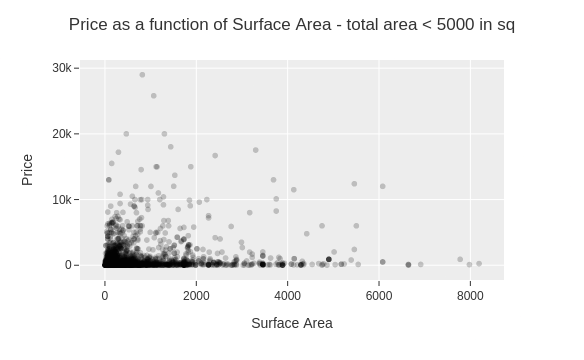

Model Score:
0.014875957473786783


In [11]:
#| code-fold: true
#| code-summary: "Answer to Exercise 2 Day 15 for paintings < 10000 in^2"

# Get the columns I care about
my_columns = ['Surface','price']
DF_model2 = DF[my_columns]

# Do some preprocessing - drop NA and make the Surface variable a float
DF_model2.dropna(inplace=True)
DF_model2['Surface'] = DF_model2['Surface'].apply(lambda x: float(x))

# Mask the data for surface area less than 10,000
mask = DF_model2['Surface'] <= 10_000
DF_model2 = DF_model2[mask]

# Make a Scatter plot
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='Price')


fig.show()

# Create the X and y variables for Linear Regression
X = DF_model2['Surface'].values.reshape(-1,1)
y = DF_model2['price'].values

# Create linear regression object - a random straight line
LM = LinearRegression()
# Train the model using the data
LM.fit(X, y)

# The score from my model
print('Model Score:')
print(LM.score(X,y))

**Exercise 1** Create a Residual plot for the model above.

1. Get the predictions - store these in a column in the data frame

```{python}
LM.predict(X)
```

2. Calculate the residuals - store these in a column in the data frame
```{python}
'Residual' = 'Real Value in the Data' - 'Value Predicted by LM'
```

3. Plot the result
```{python}
px.scatter(df,x='Value Predicted by LM',y='Residual')
```


See if you can recreate the plot shown in the lecture.

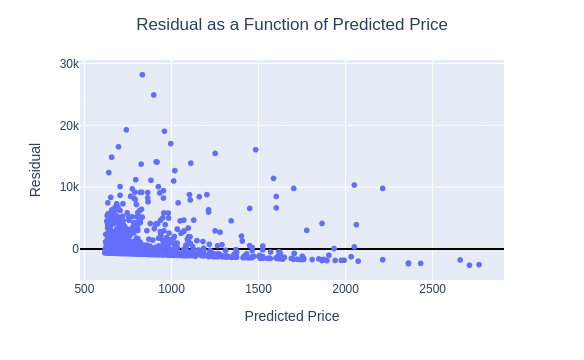

In [13]:
# Step 1
DF_model2['predicted_price'] = LM.predict(DF_model2['Surface'].values.reshape(-1,1))

# Step 2
DF_model2['residual'] = DF_model2['price'] - DF_model2['predicted_price']

# Step 3
fig = px.scatter(DF_model2, x='predicted_price', y='residual')
fig.update_layout(
    title='Residual as a Function of Predicted Price',
    title_x=0.5,
    yaxis={'zeroline':True, 'zerolinecolor':'black'},
    yaxis_title='Residual',
    xaxis_title='Predicted Price'
)
fig.show()

**Q1** What do you see here? Does this residual data seem uniformly distributed?


The residual data is not uniformly distributed. Error seems to decrease as predicted price increases.

## From Lecture - Consider the skew in the data

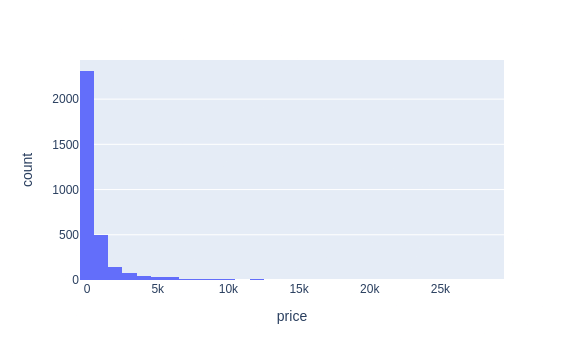

In [18]:
# Plot a histogram - notice that it is very skewed
fig = px.histogram(DF_model2,x='price',nbins =30)
fig.show()

In [19]:
# Us numpy to take the natural log of the data - removing the exponential decay
DF_model2['log_price'] = np.log(DF_model2['price'])

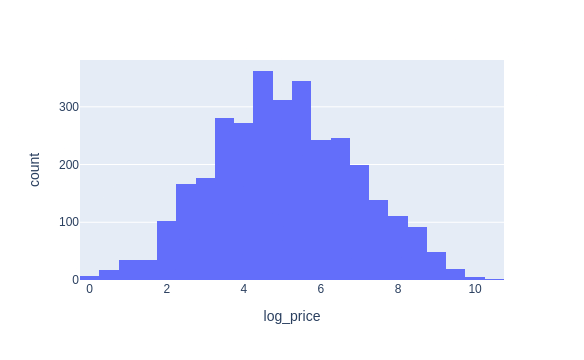

In [20]:
# Plot a histogram of the log(price) - notice we have removed the skew
fig = px.histogram(DF_model2,x='log_price',nbins =30)

fig.show()

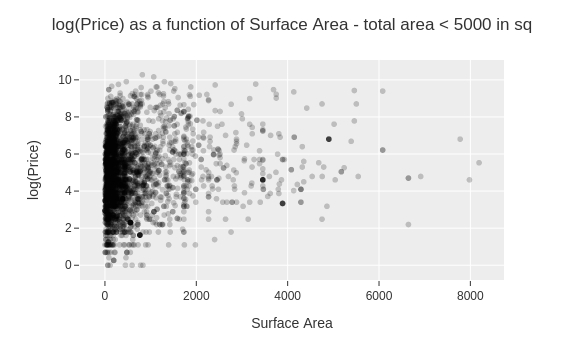

In [21]:
# Look at the scatter plot of the log(price)
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='log(Price) as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='log(Price)')


fig.show()

**Q2** What is different about the histogram and the scatter plots after taking the natural log?

Taking the natural log of the price created a normal distribution. The scatter plot also seems to indicated that surface area does not have a huge effect on price, though it does seem that lower-priced paintings are mostly smaller.

**Exercise 2:** Redo the linear regression analysis except this time use the log_price.

- Find the linear regression model (LM)
- Calculate the residual
- Plot the Residual as a function of the predicted log price
- Plot a scatter plot of the data with the linear regression line added.

*HINT* You can see my results in the lecture notes!

In [25]:
X = DF_model2['Surface'].values.reshape(-1,1)
y = DF_model2['log_price'].values

LM = LinearRegression()
LM.fit(X, y)

DF_model2['log_price_predicted'] = LM.predict(X)
DF_model2['log_price_residual'] = DF_model2['log_price'] - DF_model2['log_price_predicted']

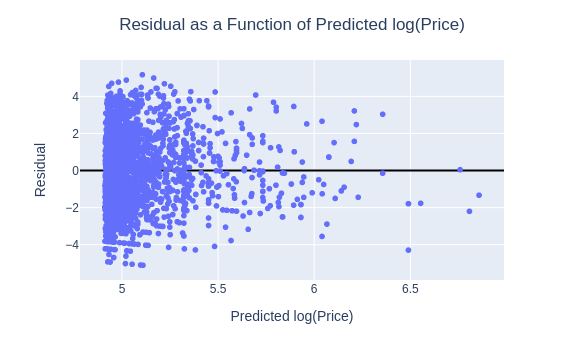

0.013268243020669424


In [26]:
fig = px.scatter(DF_model2, x='log_price_predicted', y='log_price_residual')
fig.update_layout(
    title='Residual as a Function of Predicted log(Price)',
    title_x=0.5,
    yaxis={'zeroline':True, 'zerolinecolor':'black'},
    yaxis_title='Residual',
    xaxis_title='Predicted log(Price)'
)
fig.show()

print(LM.score(X,y))

This is a pretty nicely even spread above and below the line, which probably means a linear approximation is a good choice. But the data is apparently too spread out for the score to be any good.

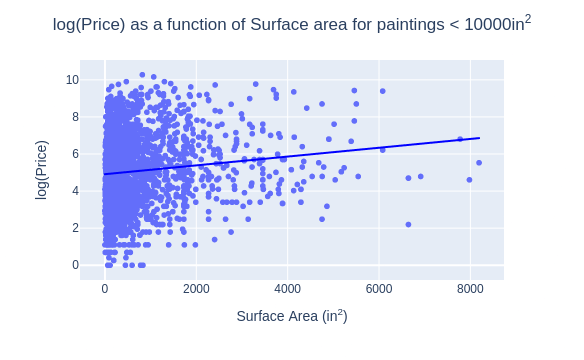

Coefficient:  [0.0002376]
Intercept  :  4.911544880415433


In [28]:
fig = px.scatter(DF_model2, x='Surface', y='log_price')

fig.update_layout(
    title='log(Price) as a function of Surface area for paintings < 10000in<sup>2</sup>',
    title_x=0.5,
    xaxis_title='Surface Area (in<sup>2</sup>)',
    yaxis_title='log(Price)'
)

fig.add_trace(
    px.line(DF_model2, x='Surface', y='log_price_predicted',color_discrete_sequence=['blue']).data[0]
)

fig.show()

print('Coefficient: ',LM.coef_)
print('Intercept  : ',LM.intercept_)

### What did we learn...

What is the model telling me?

$$ \hat{\log(price)} = 4.912 + 0.00024(Surface Area)$$

so we can calculate (see the lecture for details!)

$$ (SA+1) \sim 1.0002400288023041 * SA$$

This tells us that increase the area of the painting by one square inch increases the price by a factor of 1.0002400288023041 or about 0.024%.

There is a small positive increase in the price as the surface area increases, on average. 

Can we predict the price using the surface area? Look at LM.score(X,y)...

It does not appear that our logistic regression is a good predictor of the price. Even though it looks like we captured a good linear relationship, we do not have a good predictor. The scatter is still very large!

BUT - we are still able to see a linear trend in the model. There is a relationship here even though the data is very noisy!

**Exercise 3** Redo the full analysis except this time try using just height to predict price.

- Do a standard linear regression of the height vs. the price (without log) discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price.....
- Do a linear regression of the height vs. log_price and discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price..... Remember in this case you have to use the rules of logs and exponents to interpret the results.

Which of these models do you think is doing a better job of capturing the functional relationships in the price vs height data? Why?

In [35]:
#making another copy df because old one was too messy
ph_df = DF[['price', 'Height_in']]
ph_df = ph_df.rename(columns={'Height_in':'height'})
ph_df = ph_df[~ph_df['height'].isna()]
show(ph_df)

#### Part 1: Height vs Price

In [37]:
X = ph_df['height'].values.reshape(-1,1)
y = ph_df['price'].values

LM = LinearRegression()
LM.fit(X, y)

ph_df['price_pred'] = LM.predict(X)
ph_df['price_res'] = ph_df['price'] - ph_df['price_pred']

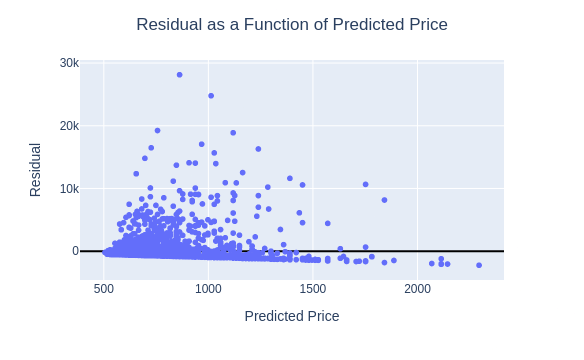

0.01276057594959179


In [38]:
fig = px.scatter(ph_df, x='price_pred', y='price_res')
fig.update_layout(
    title='Residual as a Function of Predicted Price',
    title_x=0.5,
    yaxis={'zeroline':True, 'zerolinecolor':'black'},
    yaxis_title='Residual',
    xaxis_title='Predicted Price'
)
fig.show()

print(LM.score(X,y))

This looks similar to the original Surface-Price relationship. Given the skew a linear model is not going to be a good predictor for this relationship. And the score is abysmal, so it's basically useless.

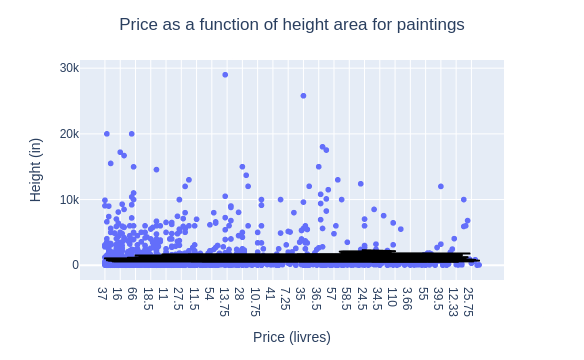

Coefficient:  [15.07549869]
Intercept  :  485.3546427150759


In [42]:
fig = px.scatter(ph_df, x='height', y='price')

fig.update_layout(
    title='Price as a function of height area for paintings',
    title_x=0.5,
    yaxis_title='Height (in)',
    xaxis_title='Price (livres)'
)

ph_df = ph_df.sort_values(by='price_pred', ascending=True)
fig.add_trace(
    px.line(ph_df, x='height', y='price_pred',color_discrete_sequence=['black']).data[0]
)

fig.show()

print('Coefficient: ',LM.coef_)
print('Intercept  : ',LM.intercept_)

The model wants us to believe that every inch of height adds about 15 livres to the price of a painting. But we don't believe it.

I am confused why my prediction line is so funky.

#### Part 2: Height vs log(Price)

In [50]:
ph_df['log_price'] = ph_df['price'].apply(np.log)

X = ph_df['height'].values.reshape(-1,1)
y = ph_df['log_price'].values

LM = LinearRegression()
LM.fit(X, y)

ph_df['log_price_pred'] = LM.predict(X)
ph_df['log_price_res'] = ph_df['log_price'] - ph_df['log_price_pred']

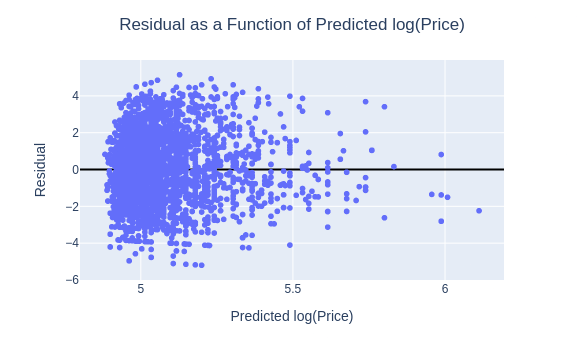

0.006754700790331358


In [51]:
fig = px.scatter(ph_df, x='log_price_pred', y='log_price_res')
fig.update_layout(
    title='Residual as a Function of Predicted log(Price)',
    title_x=0.5,
    yaxis={'zeroline':True, 'zerolinecolor':'black'},
    yaxis_title='Residual',
    xaxis_title='Predicted log(Price)'
)
fig.show()

print(LM.score(X,y))

The randomness of the vertical spread indicates that the linear relationship between height and log(price) is pretty good, but the low score shows that again there is too much scatter to use the model as a good direct predictor.

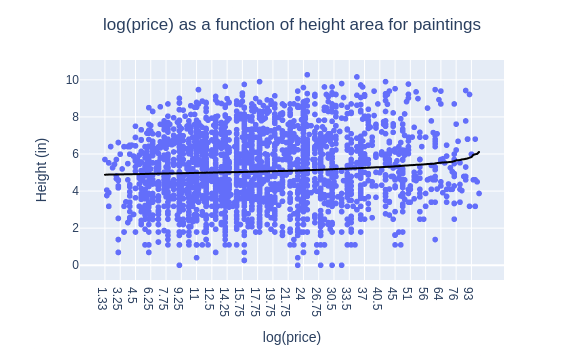

Coefficient:  [0.01036213]
Intercept  :  4.868389335057932


In [54]:
fig = px.scatter(ph_df, x='height', y='log_price')

fig.update_layout(
    title='log(price) as a function of height area for paintings',
    title_x=0.5,
    yaxis_title='Height (in)',
    xaxis_title='log(price)'
)

ph_df = ph_df.sort_values(by='log_price_pred', ascending=True)
fig.add_trace(
    px.line(ph_df, x='height', y='log_price_pred',color_discrete_sequence=['black']).data[0]
)

fig.show()

print('Coefficient: ',LM.coef_)
print('Intercept  : ',LM.intercept_)

The slope and coefficient give the following function:
$$\log(price) = 4.8684 + 0.01036(height)$$

Then we solve for $\frac{height+1}{height}$

$$\frac{height+1}{height} = x$$
$$\log(\frac{height+1}{height}) = \log(x)$$
$$\log(height+1)-\log(height) = \log(x)$$
$$(4.8684 + 0.01036(height)) - (4.8684 + 0.01036(height)) = \log(x)$$
$$0.01036=\log(x)$$
$$e^{0.01036}=x$$
$$x\approx 1.0104$$

This indicates that for each extra inch in height, a painting is about 1.04% more expensive.

### Conclusion
The second, log, model is definitely a better fit for the data. While its regression score is still abysmal and it should not be used to predict exact values, it does reflect a real linear relationship. This allowed us to determine that height does overall affect painting cost.